# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

In [4]:
ID = 160390955
sectors = np.array([55])

period = 4.4177905008
tdepth = 0.0720251716**2

lc = pd.read_csv("TOI_3568_55.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

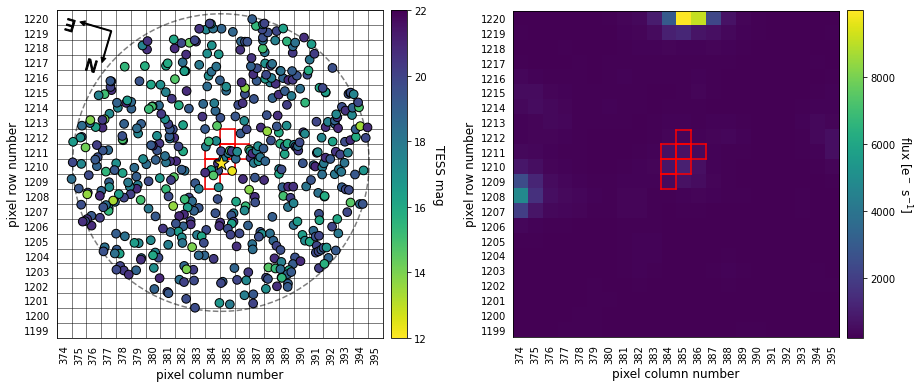

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,160390955,12.0729,11.189,10.658,10.581,322.602230,34.739614,0.792000,0.785799,4864.0,5.024290,0.000,0.000
1,2004604110,20.4095,NaN,NaN,NaN,322.603411,34.740239,NaN,NaN,NaN,NaN,4.154,57.211
2,2004604111,17.8959,NaN,NaN,NaN,322.601787,34.738083,NaN,NaN,NaN,0.116020,5.663,193.390
3,2004604113,19.5076,NaN,NaN,NaN,322.602273,34.742863,NaN,NaN,NaN,0.326158,11.697,0.620
4,2004604114,19.6809,NaN,NaN,NaN,322.603797,34.735478,NaN,NaN,NaN,2.495450,15.593,162.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2004604186,19.6945,NaN,NaN,NaN,322.593104,34.794901,NaN,NaN,NaN,0.560289,200.857,352.281
493,2004604051,18.3947,NaN,NaN,NaN,322.665137,34.760700,NaN,NaN,5983.0,0.240096,200.961,67.789
494,2004603171,20.7785,NaN,NaN,NaN,322.543205,34.711991,NaN,NaN,NaN,NaN,200.971,240.360
495,2004603009,20.6445,NaN,NaN,NaN,322.583568,34.685842,NaN,NaN,NaN,NaN,201.302,195.928


In [6]:
ap = np.array([[384, 1209], [384, 1210], [385, 1210], [384, 1211], 
               [385, 1211], [386, 1211], [385, 1212]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [7]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,160390955,12.0729,11.189,10.658,10.581,322.602230,34.739614,0.792000,0.785799,4864.0,5.024290,0.000,0.000,5.677948e-01,0.009136
1,2004604110,20.4095,NaN,NaN,NaN,322.603411,34.740239,NaN,NaN,NaN,NaN,4.154,57.211,2.571670e-04,0.000000
2,2004604111,17.8959,NaN,NaN,NaN,322.601787,34.738083,NaN,NaN,NaN,0.116020,5.663,193.390,2.732131e-03,0.000000
3,2004604113,19.5076,NaN,NaN,NaN,322.602273,34.742863,NaN,NaN,NaN,0.326158,11.697,0.620,5.177861e-04,0.000000
4,2004604114,19.6809,NaN,NaN,NaN,322.603797,34.735478,NaN,NaN,NaN,2.495450,15.593,162.703,5.030036e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2004604186,19.6945,NaN,NaN,NaN,322.593104,34.794901,NaN,NaN,NaN,0.560289,200.857,352.281,1.104943e-30,0.000000
493,2004604051,18.3947,NaN,NaN,NaN,322.665137,34.760700,NaN,NaN,5983.0,0.240096,200.961,67.789,3.362520e-36,0.000000
494,2004603171,20.7785,NaN,NaN,NaN,322.543205,34.711991,NaN,NaN,NaN,NaN,200.971,240.360,1.738159e-31,0.000000
495,2004603009,20.6445,NaN,NaN,NaN,322.583568,34.685842,NaN,NaN,NaN,NaN,201.302,195.928,5.304724e-30,0.000000


In [8]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

160390947
160385514
160385499
160390941
160390968
160385492
160390990


# Ploting CC File

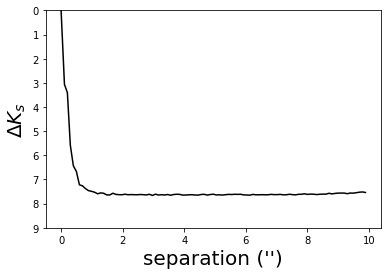

In [9]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [10]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 160390955.
Calculating EB and EBx2P scenario probabilities for 160390955.
Calculating PTP scenario probability for 160390955.
Calculating PEB and PEBx2P scenario probabilities for 160390955.
Calculating STP scenario probability for 160390955.
Calculating SEB and SEBx2P scenario probabilities for 160390955.
Calculating DTP scenario probability for 160390955.
Calculating DEB and DEBx2P scenario probabilities for 160390955.
Calculating BTP scenario probability for 160390955.
Calculating BEB and BEBx2P scenario probabilities for 160390955.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 160390947.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 160385514.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 160385499.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 160390941.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 160390968.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 1

In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.04009806778070146
NFPP =  0.0038746400378469716


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,160390955,TP,0.792000,0.785799,4.417791,88.758903,0.287749,3.757085e-02,4.198561,8.427491,0.000000,0.000000,8.170310e-01
1,160390955,EB,0.792000,0.785799,4.417791,87.169847,0.527641,6.318558e-01,198.991696,0.000000,0.149176,0.180704,2.340345e-05
2,160390955,EBx2P,0.792000,0.785799,8.835581,87.055993,1.390750,4.707676e-01,209.680884,0.000000,0.791623,0.785799,3.422792e-04
3,160390955,PTP,0.792000,0.785799,4.417791,88.970110,0.182488,2.389709e-01,91.111706,8.529342,0.000000,0.000000,9.573725e-02
4,160390955,PEB,0.792000,0.785799,4.417791,87.566063,0.358912,4.556321e-01,138.315931,0.000000,0.103394,0.124826,1.783635e-06
5,160390955,PEBx2P,0.792000,0.785799,8.835581,87.186518,1.207871,4.741529e-01,200.183686,0.000000,0.769031,0.785799,1.517163e-05
6,160390955,STP,0.770083,0.785799,4.417791,89.268839,0.121779,2.781619e-01,86.844183,12.212523,0.000000,0.000000,1.956379e-03
7,160390955,SEB,0.747834,0.778228,4.417791,89.109866,0.214006,2.472442e-04,180.539100,0.000000,0.099249,0.118917,3.377784e-02
8,160390955,SEBx2P,0.468902,0.467905,8.835581,87.209671,1.795376,7.969118e-01,232.257272,0.000000,0.450359,0.448806,8.993717e-06
9,160390955,DTP,0.792000,0.785799,4.417791,88.557952,0.199764,4.071290e-01,99.072819,8.539662,0.000000,0.000000,4.713370e-02


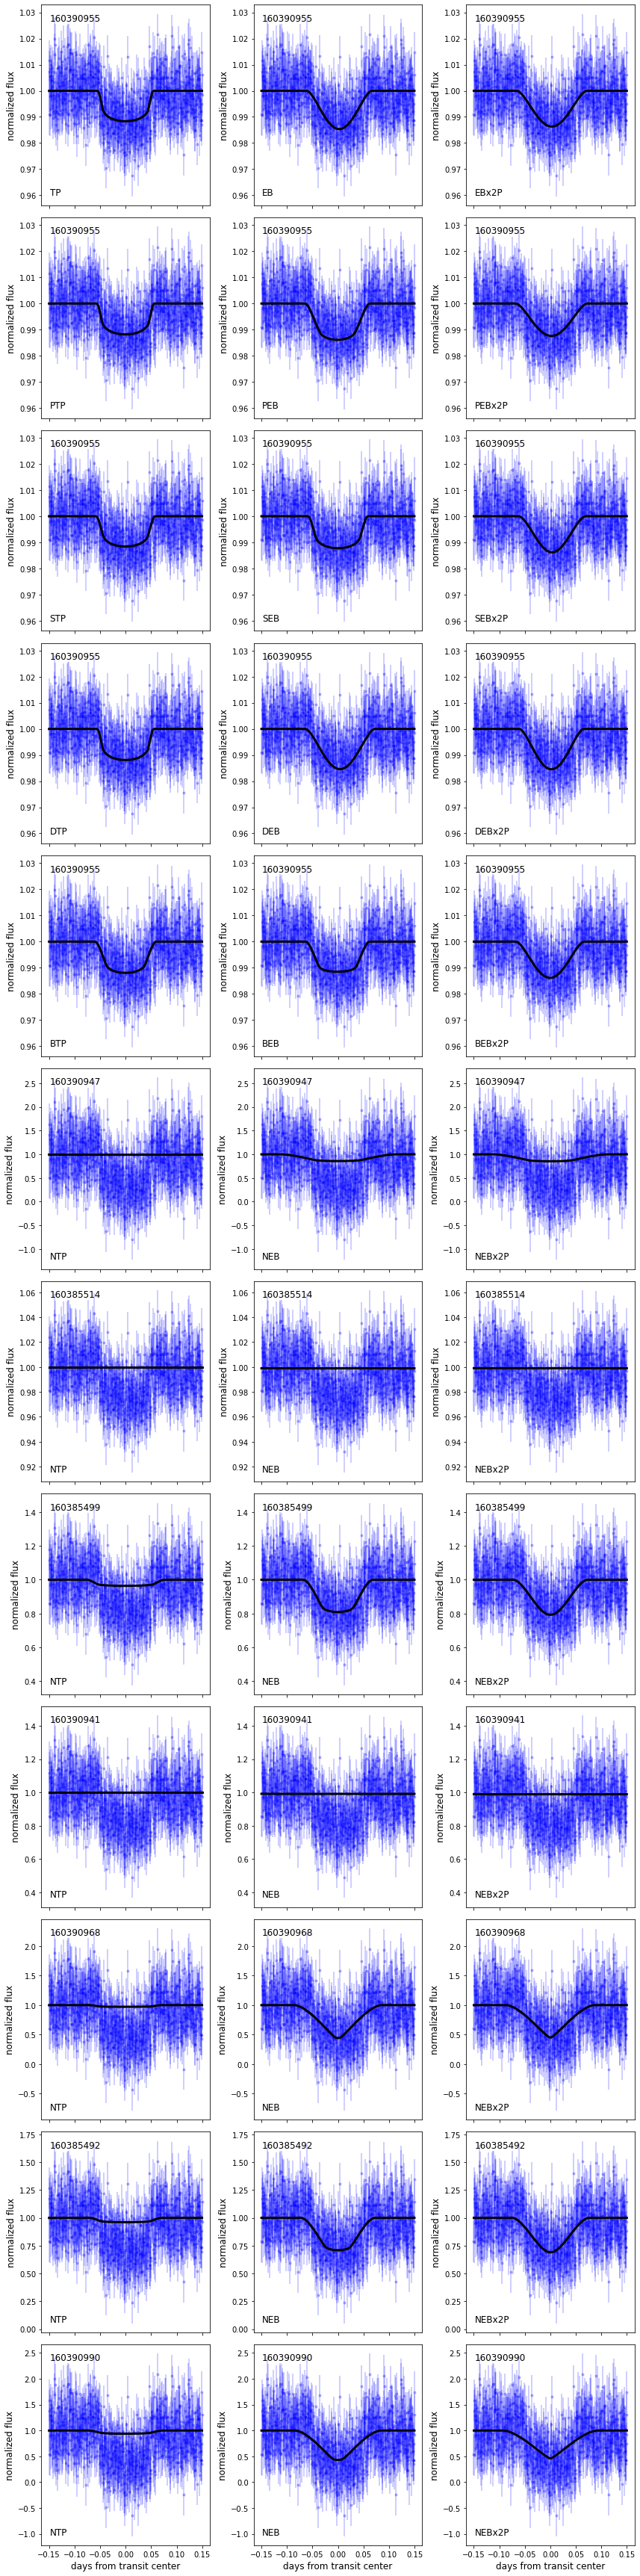

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))